You need to implement Logistic Regression from scratch in this question

1. You are provided with the dataset of sign language digits. Implement logistic regression from scratch to classify the images provided in the dataset. Load the dataset and perform splitting into training and test sets with 70:30 ratio randomly using test train split.
2. Plot a diagram for the sigmoid function. This is used for binary classi cation. How do you modify it for multilabel dataset classification problems? State and Explain the methods used.
3. Use both one vs all and one vs one method for the above problem statement purpose.
4. Also get results using Log Reg from scikit learn.
5. Report accuracy score, Confusion matrix and any other metrics you feel useful and Compare the results - from all the three.



[BONUS]
6. Display few pictures with their predicted and original labels 
7. Do the results differ? State the reasons why it is so.


dataset link : 
https://iiitaphyd-my.sharepoint.com/:f:/g/personal/apurva_jadhav_students_iiit_ac_in/Eictt5_qmoxNqezgQQiMWeIBph4sxlfA6jWAJNPnV2SF9Q?e=mQmYN0 

                

In [ ]:
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from numpy import e, log 
import seaborn as sns
from itertools import combinations
from sklearn.metrics import confusion_matrix
from sklearn import metrics


# import warnings
import warnings
# filter warnings
warnings.filterwarnings('ignore')

In [ ]:
X = np.load("X.npy") # image
Y = np.load("Y.npy") # label

X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.30, random_state=42)
number_of_train = X_train.shape[0]
number_of_test = X_test.shape[0]

print(number_of_train)
print(number_of_test)
print("X_train shape",X_train.shape)
print("X_train shape",X_test.shape)
print("y_train shape",Y_train.shape)
print("y_train shape",Y_test.shape)

1443
619
X_train shape (1443, 64, 64)
X_train shape (619, 64, 64)
y_train shape (1443, 10)
y_train shape (619, 10)


In [ ]:
X_train_flatten = X_train.reshape(number_of_train,X_train.shape[1]*X_train.shape[2])
X_test_flatten = X_test .reshape(number_of_test,X_test.shape[1]*X_test.shape[2])
print("X train flatten",X_train_flatten.shape)
print("X test flatten",X_test_flatten.shape)

'''
X_train = X_train_flatten.T
X_test = X_test_flatten.T
'''

print(Y_train[250,:])
print(Y_train[890,:])

X_train=X_train_flatten
X_test=X_test_flatten

X train flatten (1443, 4096)
X test flatten (619, 4096)
[0. 0. 0. 0. 0. 0. 0. 1. 0. 0.]
[0. 0. 0. 0. 0. 1. 0. 0. 0. 0.]


In [ ]:
""" Reference :https://towardsdatascience.com/logistic-regression-from-scratch-69db4f587e17
    some of the code is referred from the above website """

class LogReg:
  """ ovr stands for one vs all or one vs rest and ovo stands for one vs one """
  def __init__(self,learning_rate=0.1,iterations=3000,epochs=20,classify=0,mode="ovr",class1=0,class2=1):

    self.theta=None
    self.learning_rate=learning_rate
    self.iterations=iterations
    self.classify=classify 
    self.mode=mode
    self.epochs=epochs
    self.class1=class1
    self.class2=class2
    self.theta_classes=[]


  def sigmoid(self,z):
    return 1 / (1 + e**(-z))

  def cost_func(self,X,y,theta):
    """ computing likelihood cost """
    X=X.T
    z=np.dot(theta,X)

    pred_1=y*log(self.sigmoid(z))
    pred_0=(1-y)*log(1-self.sigmoid(z))

    return -sum(pred_1+pred_0)/len(X_train)

  def initialise_theta(self,X):
    theta=np.random.rand(1,X.shape[0])
    self.theta=theta.reshape(1,X.shape[0])
    for i in range(2):
      theta=np.random.rand(1,X.shape[0])
      self.theta_classes.append(theta.reshape(1,X.shape[0]))
    self.theta_classes=np.array(self.theta_classes)
    #print("inside: ",self.theta_classes )
    

  def fit(self,X,Y):
    y=[]
    X=X.T
    self.initialise_theta(X)
    if self.mode=="ovr":
      if np.array(Y).ndim==1:
          Y=np.array(Y).reshape(np.array(Y).shape[0],1)
      y=[[1 if y[int(self.classify)]==1 else 0 for y in Y ]]
      y=np.transpose(np.array(y))
      for i in range(self.iterations):
      
        y_pred=self.sigmoid(np.dot(self.theta,X))
        y_pred=np.transpose(np.array(y_pred))
      
        temp=np.dot(X,(y-y_pred)).T
        self.theta+=(self.learning_rate*temp)/(X.shape[0])
    if self.mode=="ovo":
      list_classes=[self.class1,self.class2]
      best_theta=self.theta
      for s,cls in enumerate(list_classes):
        if np.array(Y).ndim==1:
          Y=np.array(Y).reshape(np.array(Y).shape[0],1)
        y=[[1 if y[int(cls)]==1 else 0 for y in Y ]]
        y=np.transpose(np.array(y))
      ## here is a trouble that we need to perform each class individually and return two y_preds     
        #for j in range(self.epochs):
        for i in range(self.iterations):
          
          y_pred=self.sigmoid(np.dot(self.theta_classes[s],X))
          y_pred=np.transpose(np.array(y_pred))
        
          temp=np.dot(X,(y-y_pred)).T
          #print("inside loop:",self.theta_classes )
          self.theta_classes[s]+=(self.learning_rate*temp)/(X.shape[0])
      

  def predict(self, X):

    #X=X.T
    if self.mode=="ovr":
      w=self.theta
      y_pred = np.round(self.sigmoid(np.dot(X,w.T))).astype(int)
      return y_pred
    if self.mode=="ovo" or not (self.class1==0 and self.class2==0):
      #print("I entered here")
      y_pred=[None]*2
      for i in range(2):
        w=self.theta_classes[i]
        y_pred[i]=np.round(self.sigmoid(np.dot(X,w.T))).astype(int)
      return y_pred



# Implementing  one vs all model 

In [ ]:
accuracies=[]
max_score=0
max_theta=[]
for k in range(0,10):
  
  lg=LogReg(classify=k,mode="ovr")
  lg.fit(X_train,Y_train)
  """ if k==9:
    fig, (ax1, ax2) = plt.subplots(1, 2)
    fig.suptitle('sigmoid plots for test and train ')

    x=X_train
    y=Y_train
    ax1.plot(x, y)
    ax1.set_title('Train data')
  """

  y_pred=lg.predict(X_test)
  """
  if k==9:
    x=X_test
    y=y_pred
    ax2.plot(x, -y)
    ax2.set_title('Test data')

    plt.show()
    """

  y=[[1 if y[k]==1 else 0 for y in Y_test ]]
  y_test=np.transpose(np.array(y)) 
  
  score=0
  for i,j in zip(y_test,y_pred):
    if i==j:
      score+=1
  print("Accuracy for class {} = {} % ".format(k,100*score/len(Y_test)))
  cf_matrix = confusion_matrix(y_test, y_pred)

  #sns.heatmap(cf_matrix/np.sum(cf_matrix), annot=True, fmt='.2%', cmap='Blues')
  print(cf_matrix)
  if k==0:
    final_cf_matrix=cf_matrix
  else:
    final_cf_matrix+=cf_matrix
    
  #sns.heatmap(cf_matrix, annot=True)
  

  accuracies.append(100*score/len(Y_test)) 
  max_score,max_theta=score,lg.theta if score >= max_score else max_score

#cf_matrix=final_cf_matrix
#sns.heatmap(cf_matrix/np.sum(cf_matrix), annot=True, fmt='.2%', cmap='Blues')

accuracies=np.array(accuracies)
print("Mean accuracy of the model is {} ".format(np.mean(accuracies)))

Accuracy for class 0 = 97.5767366720517 % 
[[558   6]
 [  9  46]]
Accuracy for class 1 = 96.4458804523425 % 
[[545   4]
 [ 18  52]]
Accuracy for class 2 = 89.33764135702747 % 
[[498  45]
 [ 21  55]]
Accuracy for class 3 = 91.2762520193861 % 
[[553   3]
 [ 51  12]]
Accuracy for class 4 = 94.50726978998385 % 
[[550  17]
 [ 17  35]]
Accuracy for class 5 = 92.89176090468497 % 
[[555   9]
 [ 35  20]]
Accuracy for class 6 = 89.49919224555735 % 
[[554   0]
 [ 65   0]]
Accuracy for class 7 = 95.15347334410339 % 
[[538  19]
 [ 11  51]]
Accuracy for class 8 = 91.59935379644588 % 
[[559   0]
 [ 52   8]]
Accuracy for class 9 = 94.9919224555735 % 
[[543  15]
 [ 16  45]]
Mean accuracy of the model is 93.32794830371567 


## Implementing one vs one 

In [ ]:
accuracies=[]
max_score=0
max_theta=[]

r=2
arr=[0,1,2,3,4,5,6,7,8,9]
arr=list(combinations(arr, r))
print(arr)

for k in arr:
  lgr=LogReg(mode="ovo",class1=k[0],class2=k[1])
  lgr.fit(X_train,Y_train)
  y_pred=lgr.predict(X_test)
  y_pred=np.array(y_pred)

  #print(y_pred)

  temp_acc_score=[]
  for i,pred in enumerate(y_pred):
    #if (i==2) : break
    #print(pred)

    y=[[1 if y[k[i]]==1 else 0 for y in Y_test ]]
    y_test=np.transpose(np.array(y)) 
    
    score=0
    for i,j in zip(y_test,pred):
      if i==j:
        score+=1
    temp_acc_score.append(100*score/len(Y_test))
    #print("Accuracy for class {} = {} % ".format(k,100*score/len(Y_test)))
    #cf_matrix = confusion_matrix(y_test, pred)

    #sns.heatmap(cf_matrix/np.sum(cf_matrix), annot=True, fmt='.2%', cmap='Blues')
    #print(cf_matrix)      
    #sns.heatmap(cf_matrix, annot=True)
  print("Mean of k[{}] vs k[{}] classifier is = {} ".format(k[0],k[1],np.mean(np.array(temp_acc_score))))
  accuracies.append(np.mean(np.array(temp_acc_score))) 
  max_score,max_theta=score,lg.theta if score >= max_score else max_score

#cf_matrix=final_cf_matrix
#sns.heatmap(cf_matrix/np.sum(cf_matrix), annot=True, fmt='.2%', cmap='Blues')

accuracies=np.array(accuracies)
print("Mean accuracy of the model is {} ".format(np.mean(accuracies)))



[(0, 1), (0, 2), (0, 3), (0, 4), (0, 5), (0, 6), (0, 7), (0, 8), (0, 9), (1, 2), (1, 3), (1, 4), (1, 5), (1, 6), (1, 7), (1, 8), (1, 9), (2, 3), (2, 4), (2, 5), (2, 6), (2, 7), (2, 8), (2, 9), (3, 4), (3, 5), (3, 6), (3, 7), (3, 8), (3, 9), (4, 5), (4, 6), (4, 7), (4, 8), (4, 9), (5, 6), (5, 7), (5, 8), (5, 9), (6, 7), (6, 8), (6, 9), (7, 8), (7, 9), (8, 9)]
Mean of k[0] vs k[1] classifier is = 95.96122778675283 
Mean of k[0] vs k[2] classifier is = 92.7302100161551 
Mean of k[0] vs k[3] classifier is = 92.40710823909532 
Mean of k[0] vs k[4] classifier is = 94.9919224555735 
Mean of k[0] vs k[5] classifier is = 94.10339256865913 
Mean of k[0] vs k[6] classifier is = 92.97253634894992 
Mean of k[0] vs k[7] classifier is = 94.66882067851373 
Mean of k[0] vs k[8] classifier is = 91.8416801292407 
Mean of k[0] vs k[9] classifier is = 94.18416801292406 
Mean of k[1] vs k[2] classifier is = 91.92245557350566 
Mean of k[1] vs k[3] classifier is = 94.10339256865913 
Mean of k[1] vs k[4] class

### Observations:

One vs one is producing high accuracy compared to the one vs all

## One Vs All using Scikit learn library

In [ ]:
logisticRegr = LogisticRegression(multi_class="ovr")

In [ ]:
# you need to make Y-trian and Y_test in the shape of (X_train/X_test.shape[0],)

label_train= [ np.where(y==1.0) for y in Y_train]
label_train=np.array(label_train)
label_train=label_train.reshape(Y_train.shape[0],)
print(np.shape(label_train))

label_test= [ np.where(y==1.0) for y in Y_test]
label_test=np.array(label_test)
label_test=label_test.reshape(Y_test.shape[0],)
print(np.shape(label_test))

(1443,)
(619,)


#### preparing the Y_train data set for multi classa classification

In [ ]:
logisticRegr.fit(X_train, label_train)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='ovr', n_jobs=None, penalty='l2',
                   random_state=None, solver='lbfgs', tol=0.0001, verbose=0,
                   warm_start=False)

In [ ]:
predictions = logisticRegr.predict(X_test)

In [ ]:
score = logisticRegr.score(X_test, label_test)
print(score)

0.7269789983844911


#### The mean accuracy score of the model is 0.7269

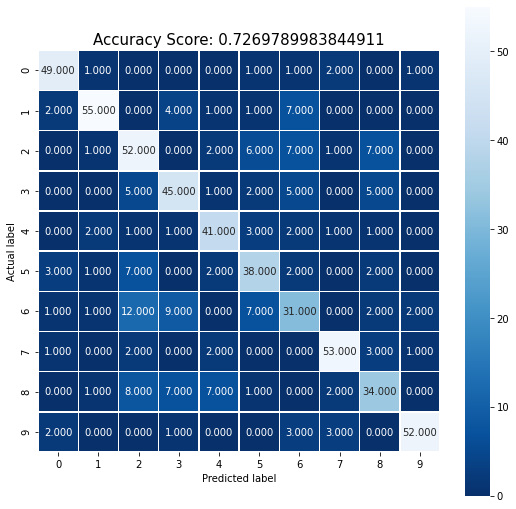

In [ ]:
cm = metrics.confusion_matrix(label_test, predictions)
plt.figure(figsize=(9,9))
sns.heatmap(cm, annot=True, fmt=".3f", linewidths=.5, square = True, cmap = 'Blues_r');
plt.ylabel('Actual label');
plt.xlabel('Predicted label');
all_sample_title = 'Accuracy Score: {0}'.format(score)
plt.title(all_sample_title, size = 15);

### Implementing one vs one 

In [ ]:
logisticReg = LogisticRegression(multi_class="multinomial")

In [ ]:
logisticReg.fit(X_train, label_train)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='multinomial', n_jobs=None, penalty='l2',
                   random_state=None, solver='lbfgs', tol=0.0001, verbose=0,
                   warm_start=False)

In [ ]:
predictions = logisticReg.predict(X_test)

In [ ]:
score = logisticReg.score(X_test, label_test)
print(score)

0.7350565428109854


#### The mean accuracy score of the model is 0.7350

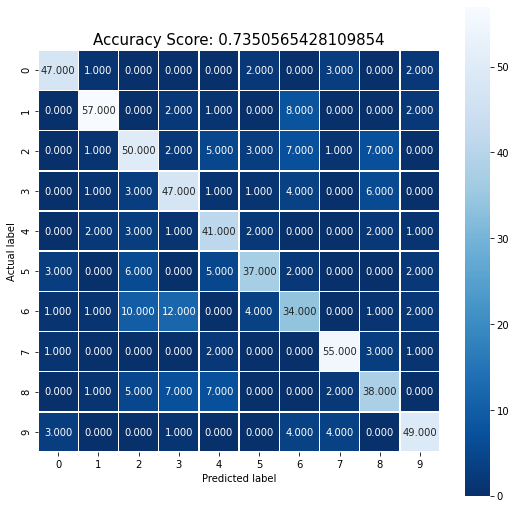

In [ ]:
cm = metrics.confusion_matrix(label_test, predictions)
plt.figure(figsize=(9,9))
sns.heatmap(cm, annot=True, fmt=".3f", linewidths=.5, square = True, cmap = 'Blues_r');
plt.ylabel('Actual label');
plt.xlabel('Predicted label');
all_sample_title = 'Accuracy Score: {0}'.format(score)
plt.title(all_sample_title, size = 15);

#### Observation:
By using scikit learn also we get high accuracy for one vs one model than one vs all model